# **Install and import required packages**

In [1]:
# Install and import required packages
!pip install openml --quiet

import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.8 MB/s eta 0:00:00


 # **Download the dataset from OpenML**

In [2]:

# Download the dataset from OpenML (ID: 1597)
dataset = openml.datasets.get_dataset(1597)
df, *_ = dataset.get_data()

# **Basic Statistics of the dataset**

In [3]:
#  Basic Info
print("Shape of dataset:", df.shape)
print(df.head())
print(df['Class'].value_counts())  # Fraud = 1, Legit = 0

Shape of dataset: (284807, 30)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27      

# **Missing value in the dataset**

In [4]:

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Feature Scaling**

In [6]:


#  Feature Scaling (only 'Amount')
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df.drop('Amount', axis=1, inplace=True)

# **Exploratry Data Analysis**

## **Class Distribution**

<ipython-input-7-1108749873>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='pastel')


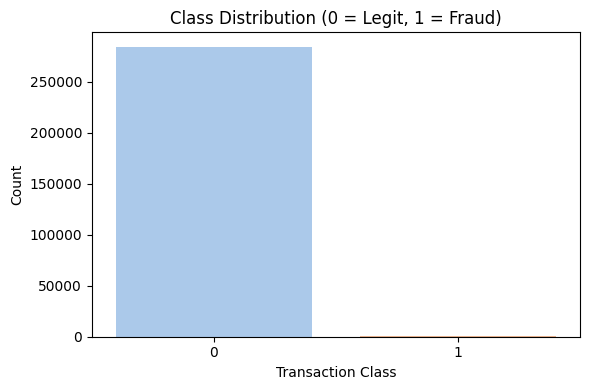

In [7]:
#  EDA - Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='pastel')
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## **Scaled Amount Distribution**

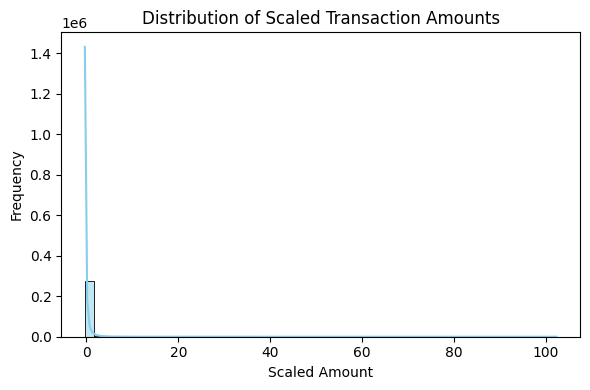

In [8]:


# 5. EDA - Scaled Amount Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['scaled_amount'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Scaled Transaction Amounts")
plt.xlabel("Scaled Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## **Correlation Heatmap**

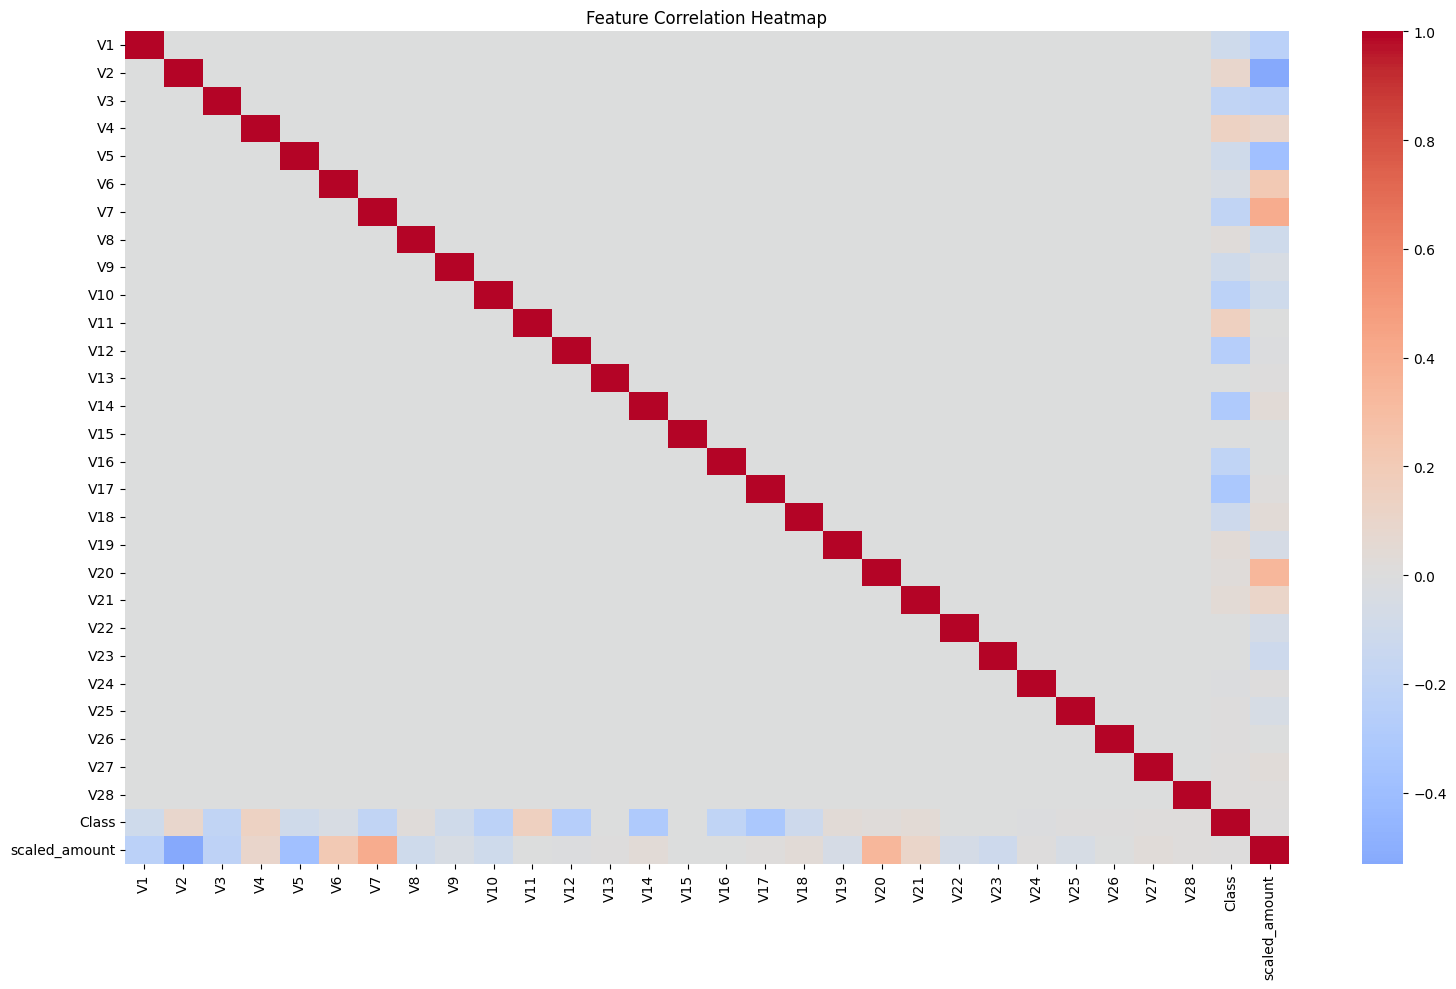

In [9]:


# Correlation Heatmap
plt.figure(figsize=(16, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## **Distribution of a few example features by class**

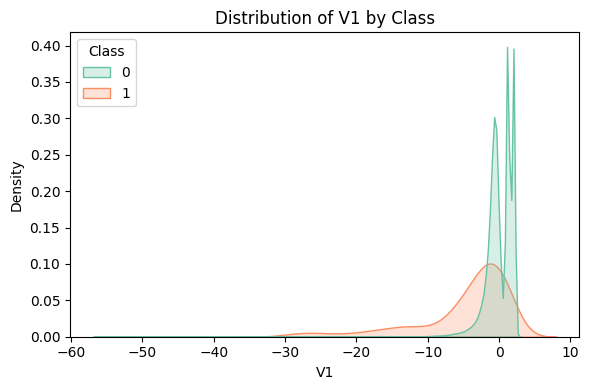

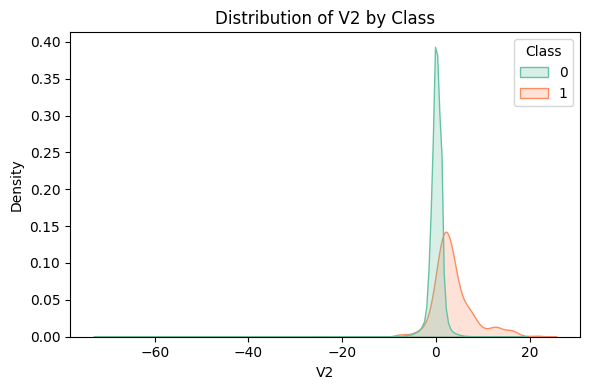

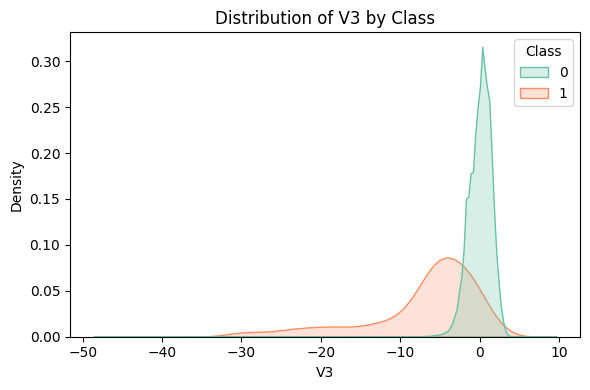

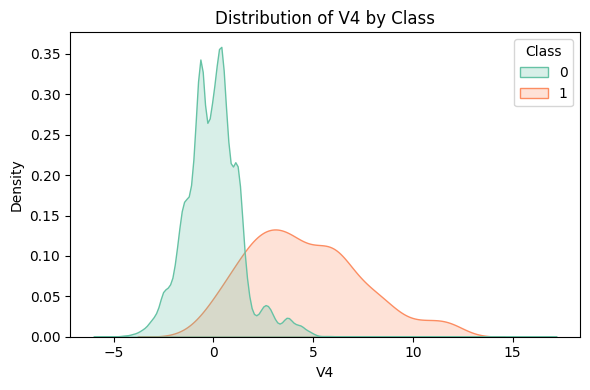

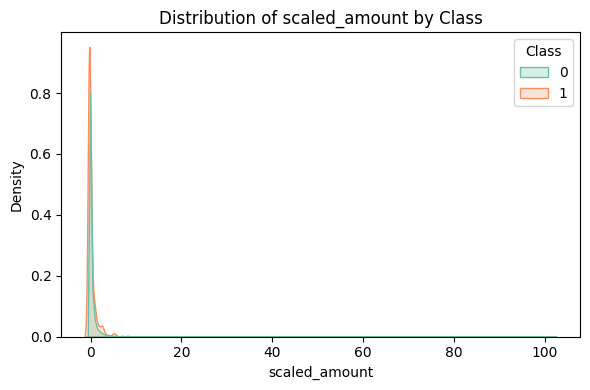

In [10]:



# 7. Distribution of a few example features by class
sample_features = ['V1', 'V2', 'V3', 'V4', 'scaled_amount']
for feature in sample_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True, common_norm=False, palette='Set2')
    plt.title(f"Distribution of {feature} by Class")
    plt.tight_layout()
    plt.show()
